<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/FindImportantPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Example for Finding peak using Scipy.signal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[2000:4000]


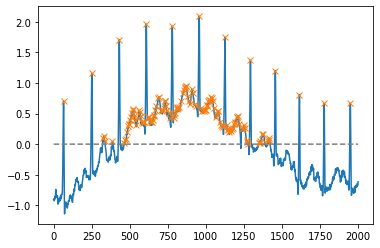

In [ ]:
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x),"--", color="gray")
plt.show()

[186 180 177 171 177 169 167 164 158 162 172]


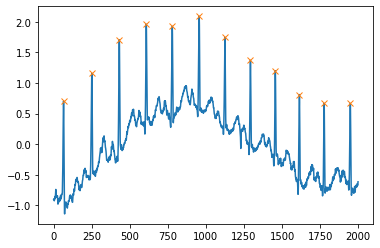

In [ ]:
peaks, _ = find_peaks(x, distance=150)
print(np.diff(peaks))

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

0.545


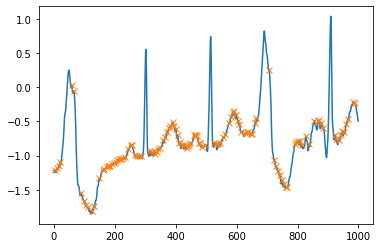

In [ ]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
print(properties["prominences"].max())
plt.plot(x)
plt.plot(peaks, x[peaks],"x")
plt.show()

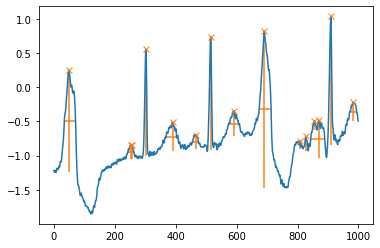

In [ ]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=0.1, width=2)
properties["prominences"], properties["widths"]

plt.plot(x)
plt.plot(peaks, x[peaks],  "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")

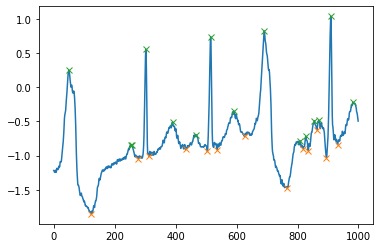

In [ ]:
def find_peak_set(x, prominence = 0.1, width = 2):
  max, _ = find_peaks(x, prominence= prominence, width=width)
  min, _ = find_peaks(-x, prominence= prominence, width=width)
  return min, max

min, max = find_peak_set(x)
plt.plot(x)
plt.plot(min, x[min], 'x')
plt.plot(max, x[max],'x')

## This code to implement compressed searching similarity in the book "Data Mining In Time Series Databases", 2004, Marj Last et al.
- Three functions are implemented
  * Find_First
  * Find_Min
  * Find_Max



## Alogrithm

In [ ]:
## Find the first important point fucntion
## input: set of points
## output: indices of the first important points
minSet = []
maxSet = []
peakSet = []
def Find_Important(a, R):
  a1 = a - a.min() + 0.000001 ##remove the 0 problems
  if len(a) != 0:
    peakSet.append(0);

  k = Find_First(a1, R)
  #print(k)
  if k < len(a1) and a1[k]> a1[0]:
    k = Find_Maximum(a1, R, k)
    #print(k)
  while (k < len(a1)):
    k = Find_Minimum(a1, R, k);
    #print(k)
    k = Find_Maximum(a1, R, k);
    #print(k)
  peakSet.append(len(a1)-1)
  return peakSet

def Find_First(a, R):
  
  n = len(a) ;
  if n == 0:
    return -1
  else:
    iMin = 1; iMax = 1; i =2
    while i < n and (a[i]/a[iMin]) < R and (a[iMax]/a[i]) < R:
      if a[i] < a[iMin]: 
        iMin = i;
      if a[i] > a[iMax]:
        iMax = i;
      i = i + 1
    if iMin < iMax:
      minSet.append(iMin)
      peakSet.append(iMin)
    else:
      maxSet.append(iMax)
      peakSet.append(iMax)
  return i
  
def Find_Minimum(a, R, i):
  n = len(a)
  if i == n:
    return n
  iMin = i
  while i < n and (a[i]/a[iMin]) < R:
    if a[i] < a[iMin]:
      iMin = i;
    i = i + 1;
  if i == n:
    return i
  if i<n or a[iMin] < a[i]:
    minSet.append(iMin)
    peakSet.append(iMin)
  return i

def Find_Maximum(a, R, i):
  n = len(a)
  if i == n:
    return n
  iMax = i
  while i < n and (a[iMax]/a[i]) < R:
    if a[i] > a[iMax]:
      iMax = i;
    i = i + 1;
  if i == n:
    return i
  if i<n or a[iMax] > a[i]:
    maxSet.append(iMax)
    peakSet.append(iMax)
  return i
### Find important point




In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.max()

1.04

In [ ]:
Find_First(x, R=1.5)

4250

### Print out the set of important peaks

In [ ]:
minSet = []
maxSet = []
peakSet = []
peakSet = Find_Important(x, R= 1.9)
print(peakSet, minSet, maxSet)

27
46
68
73
89
96
255
322
436
604
615
777
785
954
962
1123
1131
1290
1298
1453
1461
1608
1618
1690
1756
1772
1780
1849
1938
1943
1953
2000
2000
[0, 4, 28, 65, 72, 80, 90, 251, 274, 431, 450, 608, 769, 779, 786, 956, 1115, 1125, 1283, 1292, 1446, 1456, 1605, 1614, 1644, 1695, 1766, 1776, 1783, 1867, 1938, 1948, 1999] [4, 28, 72, 90, 274, 450, 769, 786, 1115, 1283, 1446, 1605, 1644, 1766, 1783, 1938] [65, 80, 251, 431, 608, 779, 956, 1125, 1292, 1456, 1614, 1695, 1776, 1867, 1948]


In [ ]:
x + x.min()

-1.14

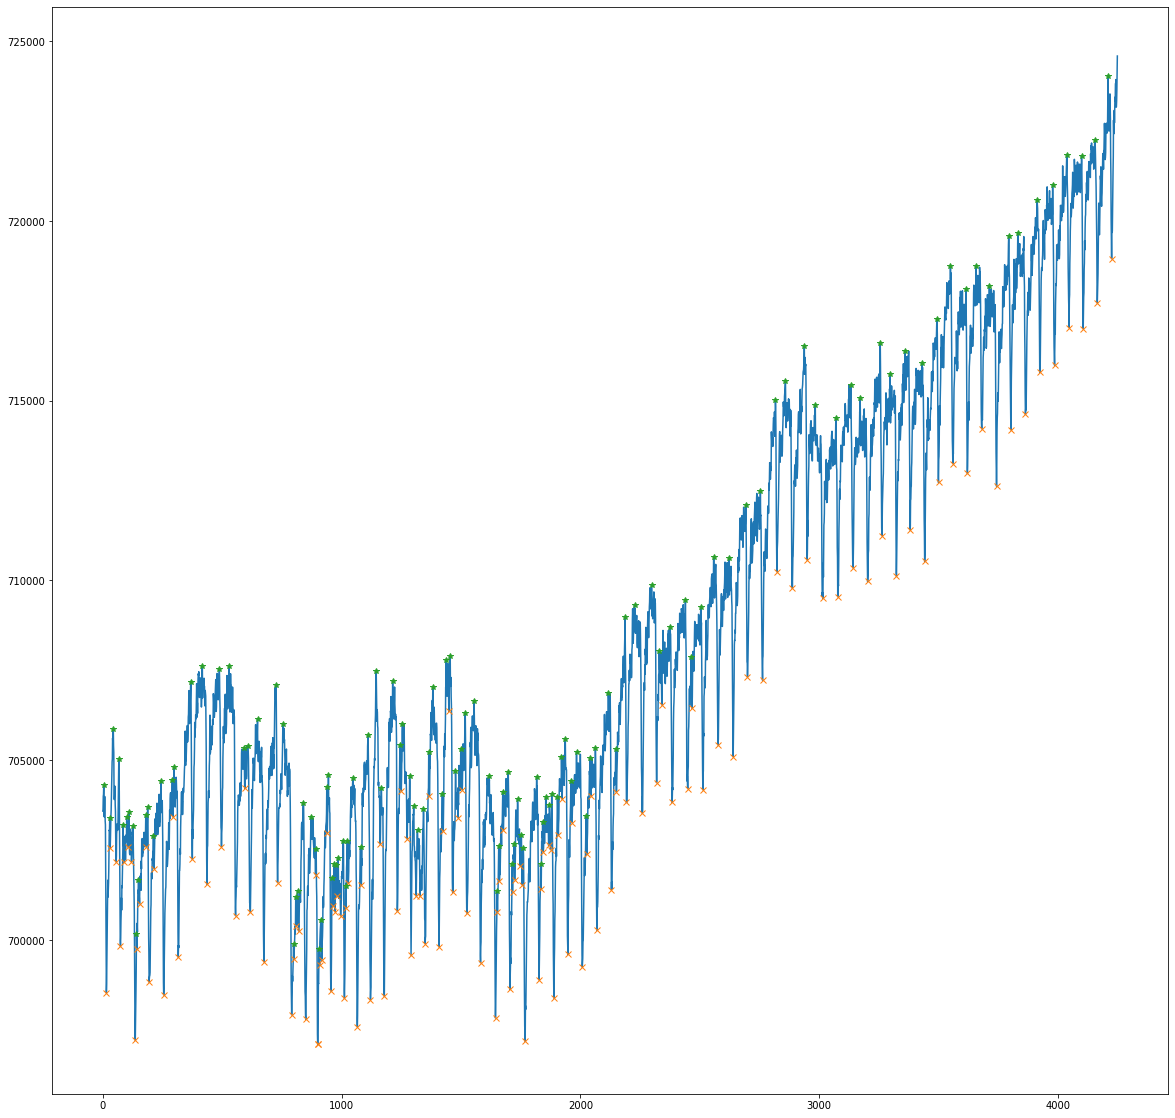

In [ ]:
#plt.figure(figsize=(20, 20))

plt.plot(x)
plt.plot(minSet, x[minSet], 'x')
plt.plot(maxSet, x[maxSet], '*')


### Test PPG signals

### Import data

In [ ]:
import pandas as pd
ppg  = pd.read_csv('cunA0.csv')

In [ ]:
ppg.describe()

,850nm,640nm,940nm,580nm,Channel 5,Channel 6,Channel 7,Channel 8
count,4250.000000,4.250000e+03,4250.000000,4.250000e+03,4250.0,4250.0,4250.0,4250.0
mean,526584.883765,-1.187460e+06,708623.464471,-1.549472e+06,0.0,0.0,0.0,0.0
std,5200.074713,3.806470e+03,6361.330314,1.549756e+03,0.0,0.0,0.0,0.0
min,516146.000000,-1.195450e+06,697098.000000,-1.554290e+06,0.0,0.0,0.0,0.0
25%,522450.000000,-1.191038e+06,703486.000000,-1.550100e+06,0.0,0.0,0.0,0.0
50%,525057.000000,-1.185760e+06,706672.000000,-1.549110e+06,0.0,0.0,0.0,0.0
75%,531236.500000,-1.184040e+06,714236.000000,-1.548390e+06,0.0,0.0,0.0,0.0
max,539112.000000,-1.181630e+06,724586.000000,-1.546400e+06,0.0,0.0,0.0,0.0


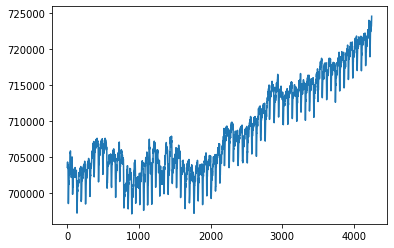

In [ ]:
x = ppg['940nm']
plt.plot(x)

In [ ]:
### Extracting prominent peaks 
minSet1 = []
maxSet1 = []
peakSet1 = []
peakSet2 = []
peakSet1 = Find_Important(ppg['940nm'], R= 1.5)
peakSet2 = Find_Important(ppg['850nm'], R= 1.5)
#print(peakSet, minSet, maxSet)

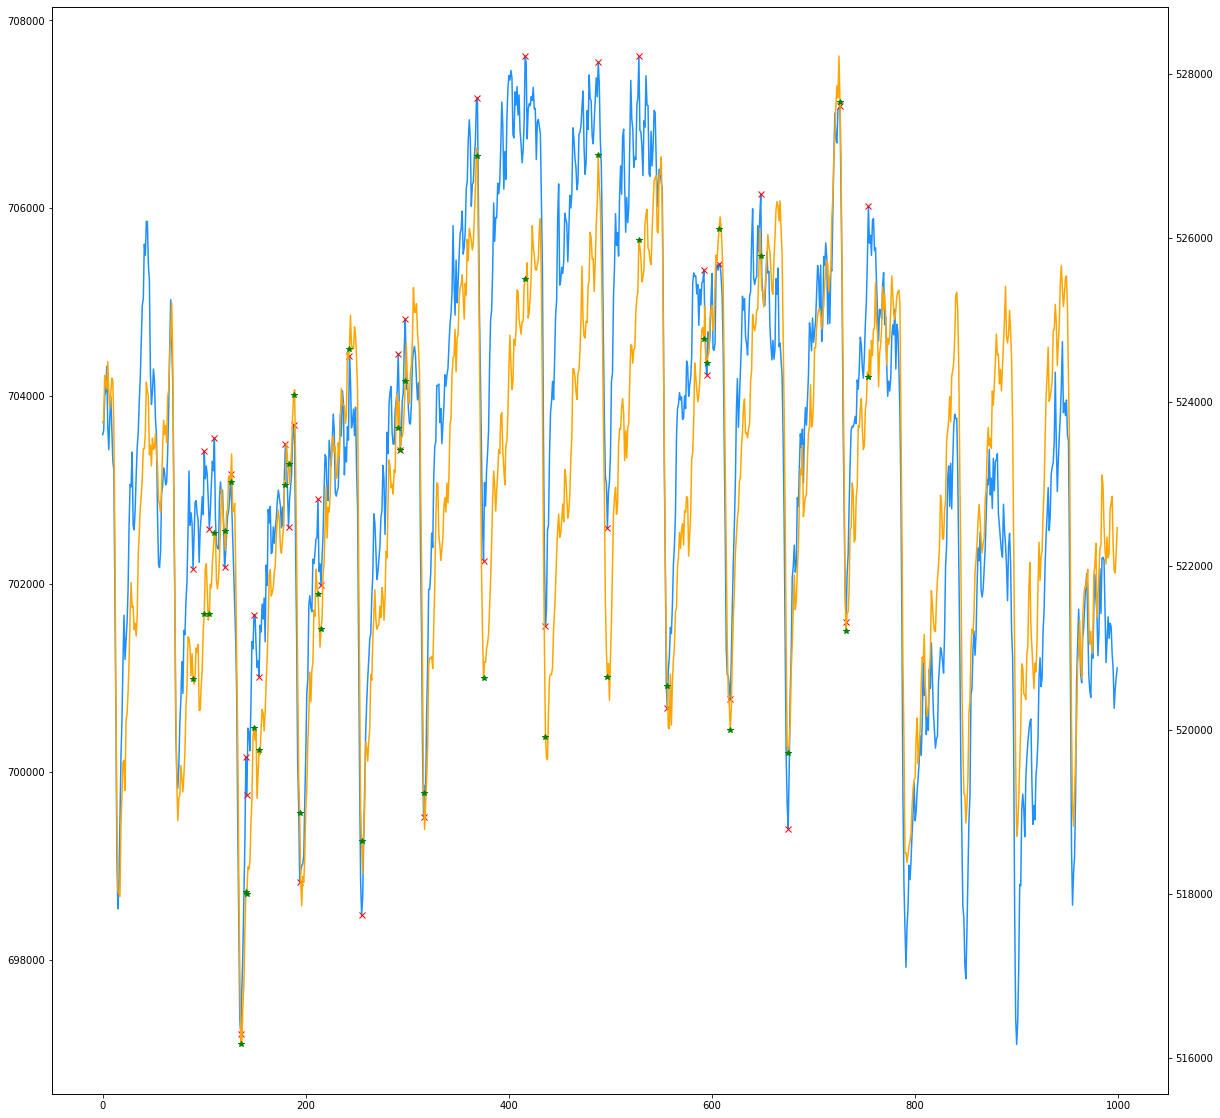

In [ ]:
### Plot data
#plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(ppg['940nm'][0:1000], color= 'dodgerblue')
#t= range(50)
pk1 = peakSet1[10:50]
ax.plot(pk1, ppg['940nm'][pk1], 'rx')
ax2 = ax.twinx()

pk2 = peakSet2[10:50]
ax2.plot(ppg['850nm'][0:1000], color= 'orange')
ax2.plot(pk2, ppg['850nm'][pk2], 'g*')

fig.savefig('peaks.png', format='png', dpi=300)

In [ ]:
len(peakSet1), len(peakSet2)

(1491, 1491)